In [3]:
def Subtract(digits_a, digits_b, radix): # алгоритм достаточно очевиден
    result = digits_a.copy()
    
    for i in range(1, len(digits_b) + 1):
        result[-i] -= digits_b[-i]
        
    for i in reversed(range(1, len(result))):
        while result[i] < 0:
            result[i - 1] -= 1
            result[i] += radix
    
    return result

In [4]:
def K(number, radix, digits_with_zeros):
    digits = [int(d) for d in str(number)]
    
    digits_dec = sorted(digits, reverse=True)
    
    # добавляются недостающие ведущие нули(в конец отсортированного в порядке убывания массива цифр)
    while len(digits_dec) < digits_with_zeros: 
        digits_dec.append(0)
        
    digits_inc = digits_dec[::-1]
    
    result_digits = Subtract(digits_dec, digits_inc, radix)
    
    result = int(''.join(map(str, result_digits)))
    
    return result

In [5]:
K(6174, 10, 4)

6174

In [6]:
def Numbers(radix, max_num_digits): # генерируются все числа от 0 до radix**max_num_digits - 1
    number = [0]
    num_digits = 1
    
    while True:
        yield number
        
        k = 1
        while number[-k] == radix - 1: # 
            number[-k] = 0
            k += 1
            
            if k > num_digits:
                number = [0] + number
                num_digits += 1
                break
                
        if num_digits > max_num_digits:
            break
            
        number[-k] += 1        

In [7]:
# все то же самое, только теперь функция принимает и выдает числа в виде массива цифр
def K(digits, radix, digits_with_zeros): 
    digits_dec = sorted(digits, reverse=True)
    
    while len(digits_dec) < digits_with_zeros:
        digits_dec.append(0)
        
    digits_inc = digits_dec[::-1]
    
    result_digits = Subtract(digits_dec, digits_inc, radix)
    
    while result_digits[0] == 0 and len(result_digits) > 1: # удаление ведущих нулей в результате
        result_digits = result_digits[1:];
    
    return result_digits

In [8]:
import itertools

In [9]:
def findFixedPoints(rs, ds): # попробуем найти неподвижные точки простым перебором

    fixedPoints = {}

    for r, d in itertools.product(rs, ds):
        fixedPoints[(r, d)] = []
        for digits in Numbers(r, d):
            if K(digits, r, d) == digits:
                fixedPoints[(r, d)].append(digits.copy())
    
    return fixedPoints

In [10]:
%%time
rs = range(2, 8)
ds = range(2, 8)

fixed_points_slow = findFixedPoints(rs, ds) # долгоооо

Wall time: 6.93 s


In [11]:
fixed_points_slow

{(2, 2): [[0], [1]],
 (2, 3): [[0], [1, 1]],
 (2, 4): [[0], [1, 1, 1], [1, 0, 0, 1]],
 (2, 5): [[0], [1, 1, 1, 1], [1, 0, 1, 0, 1]],
 (2, 6): [[0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0, 1], [1, 1, 0, 0, 0, 1]],
 (2, 7): [[0],
  [1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 0, 1],
  [1, 1, 0, 1, 0, 0, 1]],
 (3, 2): [[0]],
 (3, 3): [[0]],
 (3, 4): [[0]],
 (3, 5): [[0], [2, 0, 2, 1, 1]],
 (3, 6): [[0]],
 (3, 7): [[0], [2, 2, 0, 2, 1, 0, 1]],
 (4, 2): [[0]],
 (4, 3): [[0], [1, 3, 2]],
 (4, 4): [[0], [3, 0, 2, 1]],
 (4, 5): [[0]],
 (4, 6): [[0], [2, 1, 3, 3, 1, 2], [3, 1, 0, 2, 2, 1], [3, 3, 0, 2, 0, 1]],
 (4, 7): [[0], [3, 2, 0, 3, 2, 1, 1]],
 (5, 2): [[0], [1, 3]],
 (5, 3): [[0]],
 (5, 4): [[0], [3, 0, 3, 2]],
 (5, 5): [[0]],
 (5, 6): [[0]],
 (5, 7): [[0]],
 (6, 2): [[0]],
 (6, 3): [[0], [2, 5, 3]],
 (6, 4): [[0]],
 (6, 5): [[0], [4, 1, 5, 3, 2]],
 (6, 6): [[0], [3, 2, 5, 5, 2, 3], [4, 2, 0, 4, 3, 2], [5, 3, 0, 4, 2, 1]],
 (6, 7): [[0]],
 (7, 2): [[0]],
 (7, 3): [[0]],
 (7, 4): [[0]],
 (7, 5): [[0]],


In [12]:
 # посчитаем кол-во неподвижных точек для каждой из комбинаций
num_fixed_points_slow = [[len(fixed_points_slow[(r, d)]) for d in ds] for r in rs]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

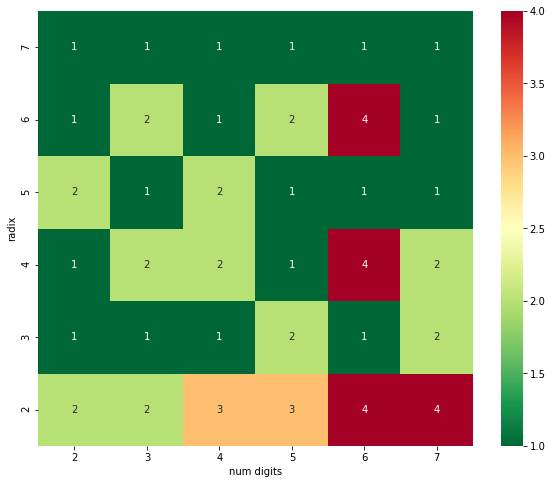

In [14]:
# опционально можно посмотреть на красивую(пока не очень) картинку
fig, ax = plt.subplots(1, 1, figsize=(10, 8));
sns.heatmap(num_fixed_points_slow, xticklabels=ds, yticklabels=rs, annot=True, ax=ax, cmap='RdYlGn_r', square=True);
ax.set_xlabel('num digits');
ax.set_ylabel('radix');
ax.set(xlim=(0, len(ds)), ylim=(0, len(rs))); # без этого график, почему-то обрезается

Не обязательно перебирать все числа. Достаточно перебрать все различные комбинации цифр:

(1) Пусть a и b - числа, составленные из одного набора цифр, тогда K(a) = K(b), т.к. значение функции капрекара не зависит от порядка цифр в числе.

(2) Если y = K(x) состоит из тех же цифр, что и x, то y - неподвижная точка(т.к. y = K(x) = K(y) по (1)). При этом, любая перестановка цифр числа x кроме y(обозначим эту перестановку z) не будет являться неподвижной точкой, т.к. z != y = K(y) = K(x) = K(z).

Таким образом, достаточно перебрать по одному числу из каждого класса эквивалентности, задаваемого отношением одинаковости цифр, оставляющих число.
Будем перебирать все числа, цифры которых расположены в порядке неубывания.

In [15]:
# перебираются все различные комбинации цифр 0, ..., radix-1 длины max_num_digits
# без ведущих нулей
def Numbers(radix, max_num_digits):
    number = [0]
    num_digits = 1
    
    while True:
        yield number
        
        k = 1
        while number[-k] == radix - 1:
            number[-k] = 0
            k += 1
            
            if k > num_digits:
                number = [0] + number
                num_digits += 1
                break
        if num_digits > max_num_digits:
            break
        number[-k] += 1    
        
        i = k - 1
        while i > 0:
            number[-i] = number[-k]
            i -= 1

In [16]:
def findFixedPoints(rs, ds): # немного меняется критерий нахождения неподвижной точки

    fixedPoints = {}


    for r, d in itertools.product(rs, ds):
        fixedPoints[(r, d)] = []
        
        for digits in Numbers(r, d):
            image = K(digits, r, d)
            
            sorted_image = sorted(image)
            
            # удаление ведущих нулей из результата после его сортировки, т.к. в digits ведущих нулей нет
            while sorted_image[0] == 0 and len(sorted_image) > 1: 
                sorted_image = sorted_image[1:]
                
            if sorted_image == digits: # состоят ли digits и K(digits) из одних и тех же цифр?
                fixedPoints[(r, d)].append(image.copy())
    
    return fixedPoints

In [17]:
%%time
rs = range(2, 8)
ds = range(2, 8)

fixed_points_fast = findFixedPoints(rs, ds) # намного быстрее

Wall time: 38.9 ms


In [18]:
fixed_points_fast

{(2, 2): [[0], [1]],
 (2, 3): [[0], [1, 1]],
 (2, 4): [[0], [1, 0, 0, 1], [1, 1, 1]],
 (2, 5): [[0], [1, 0, 1, 0, 1], [1, 1, 1, 1]],
 (2, 6): [[0], [1, 1, 0, 0, 0, 1], [1, 0, 1, 1, 0, 1], [1, 1, 1, 1, 1]],
 (2, 7): [[0],
  [1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 1, 0, 1],
  [1, 1, 1, 1, 1, 1]],
 (3, 2): [[0]],
 (3, 3): [[0]],
 (3, 4): [[0]],
 (3, 5): [[0], [2, 0, 2, 1, 1]],
 (3, 6): [[0]],
 (3, 7): [[0], [2, 2, 0, 2, 1, 0, 1]],
 (4, 2): [[0]],
 (4, 3): [[0], [1, 3, 2]],
 (4, 4): [[0], [3, 0, 2, 1]],
 (4, 5): [[0]],
 (4, 6): [[0], [3, 3, 0, 2, 0, 1], [3, 1, 0, 2, 2, 1], [2, 1, 3, 3, 1, 2]],
 (4, 7): [[0], [3, 2, 0, 3, 2, 1, 1]],
 (5, 2): [[0], [1, 3]],
 (5, 3): [[0]],
 (5, 4): [[0], [3, 0, 3, 2]],
 (5, 5): [[0]],
 (5, 6): [[0]],
 (5, 7): [[0]],
 (6, 2): [[0]],
 (6, 3): [[0], [2, 5, 3]],
 (6, 4): [[0]],
 (6, 5): [[0], [4, 1, 5, 3, 2]],
 (6, 6): [[0], [5, 3, 0, 4, 2, 1], [4, 2, 0, 4, 3, 2], [3, 2, 5, 5, 2, 3]],
 (6, 7): [[0]],
 (7, 2): [[0]],
 (7, 3): [[0]],
 (7, 4): [[0]],
 (7, 5): [[0]],


In [19]:
# Совпадают ли эти точки с найденными ранее
for r, d in fixed_points_fast.keys():
    if not all([fixed_point in fixed_points_slow[(r, d)] for fixed_point in fixed_points_fast[(r, d)]]):
        print('aaaaaaaaaaaaa')
        break
for r, d in fixed_points_slow.keys():
    if not all([fixed_point in fixed_points_fast[(r, d)] for fixed_point in fixed_points_slow[(r, d)]]):
        print('bbbbbbbbbbbbb')
        break

In [20]:
 # посчитаем кол-во неподвижных точек для каждой из комбинаций
num_fixed_points_fast = [[len(fixed_points_fast[(r, d)]) for d in ds] for r in rs]

In [21]:
num_fixed_points_fast

[[2, 2, 3, 3, 4, 4],
 [1, 1, 1, 2, 1, 2],
 [1, 2, 2, 1, 4, 2],
 [2, 1, 2, 1, 1, 1],
 [1, 2, 1, 2, 4, 1],
 [1, 1, 1, 1, 1, 1]]

Для поиска циклов также достаточно перебрать по одному числу из каждого класса эквивалентности.

Будем сохранять встретившиеся числа, как массив расположенных в порядке неубывания цифр. Тогда, проверка "зацикливания" сводится к сортировке цифр числа полученного при n-кратном применении функции K к x0(получили число u) и сравнивании его с уже встретившимися числами. Если найдено совпадение, то u, K(u), ..., K(K(...K(u))) = u - цикл.

In [22]:
def findCycles(rs, ds):

    cycles = {}

    for r, d in itertools.product(rs, ds):

        cycles[(r, d)] = []
        
        encountered_numbers = []
        
        for digits in Numbers(r, d):
            initial_number = digits.copy()
            
            current_number = digits.copy()
            sorted_current_number = current_number.copy() # уже отсортировано
            locally_encountered_numbers = []
            
            while True:
                locally_encountered_numbers.append(sorted_current_number)
                
                current_number = K(current_number, r, d)
                sorted_current_number = sorted(current_number)
                
                # удаление ведущих нулей в отсортированном числе
                while sorted_current_number[0] == 0 and len(sorted_current_number) > 1: 
                    sorted_current_number = sorted_current_number[1:]
                    
                if sorted_current_number in encountered_numbers: # в этом случае ничего нового мы уже не найдем
                    break
                    
                if sorted_current_number in locally_encountered_numbers: # нашли цикл
                    cycle = [current_number.copy()]
                    temp = K(current_number, r, d)
                    while temp != current_number:
                        cycle.append(temp)
                        temp = K(temp, r, d)
                    cycles[(r, d)].append(cycle)
                    break
                
                
            # inital_number может уже содержаться в encountered_numbers, 
            # т.к. его добавление проихсодит без проверки(первая строка цикла)
            # добавление еще одной проверки СИЛЬНО замедляет работу программы(почему-то)
            # таким образом некоторые значения в encountered_numbers могут повторяться(не более 1-го раза)
            encountered_numbers += locally_encountered_numbers

    return cycles

In [23]:
%%time
rs = range(2, 14)
ds = range(2, 14)

cycles = findCycles(rs, ds)

Wall time: 24min 11s


In [24]:
fixed_points = {key:list(map(lambda x: x[0], filter(lambda x: len(x) == 1, cycles[key]))) for key in cycles}

In [25]:
fixed_points

{(2, 2): [[0], [1]],
 (2, 3): [[0], [1, 1]],
 (2, 4): [[0], [1, 1, 1], [1, 0, 0, 1]],
 (2, 5): [[0], [1, 1, 1, 1], [1, 0, 1, 0, 1]],
 (2, 6): [[0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0, 1], [1, 1, 0, 0, 0, 1]],
 (2, 7): [[0],
  [1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 0, 1],
  [1, 1, 0, 1, 0, 0, 1]],
 (2, 8): [[0],
  [1, 1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1, 0, 1],
  [1, 1, 0, 1, 1, 0, 0, 1],
  [1, 1, 1, 0, 0, 0, 0, 1]],
 (2, 9): [[0],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1, 1, 0, 1],
  [1, 1, 0, 1, 1, 1, 0, 0, 1],
  [1, 1, 1, 0, 1, 0, 0, 0, 1]],
 (2, 10): [[0],
  [1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
  [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
  [1, 1, 1, 0, 1, 1, 0, 0, 0, 1],
  [1, 1, 1, 1, 0, 0, 0, 0, 0, 1]],
 (2, 11): [[0],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
  [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
  [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1],
  [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]],
 (2, 12): [[0],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 0,

In [26]:
num_fixed_points = [[len(fixed_points[(r, d)]) for d in ds] for r in rs]

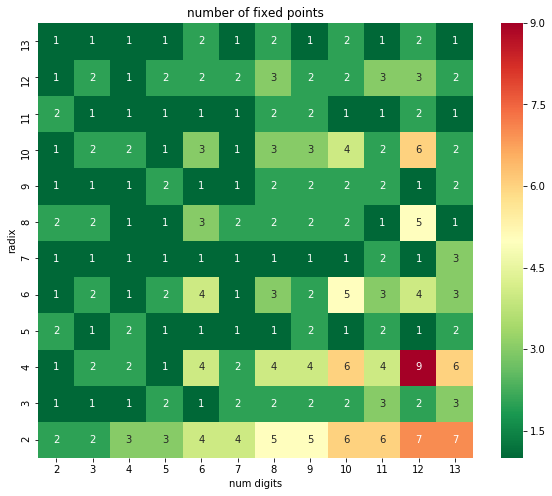

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8));
sns.heatmap(num_fixed_points, xticklabels=ds, yticklabels=rs, annot=True, ax=ax, cmap='RdYlGn_r', square=True);
ax.set_title('number of fixed points')
ax.set_xlabel('num digits');
ax.set_ylabel('radix');
ax.set(xlim=(0, len(ds)), ylim=(0, len(rs)));

In [28]:
num_cycles =  [[len(cycles[(r, d)]) for d in ds] for r in rs]

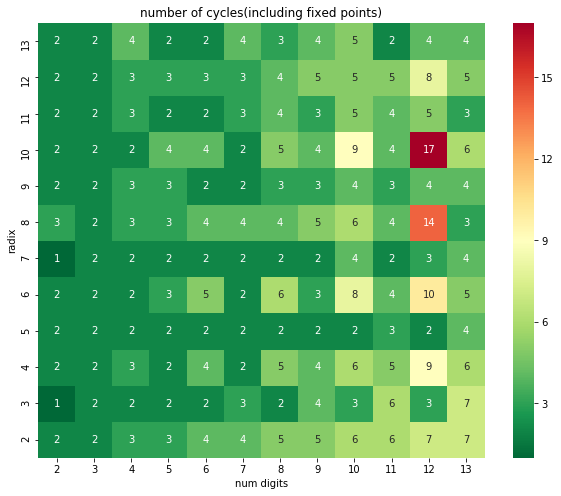

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8));
sns.heatmap(num_cycles, xticklabels=ds, yticklabels=rs, annot=True, ax=ax, cmap='RdYlGn_r');
ax.set_title('number of cycles(including fixed points)')
ax.set_xlabel('num digits');
ax.set_ylabel('radix');
ax.set(xlim=(0, len(ds)), ylim=(0, len(rs)));

In [30]:
max_lengths = [[max(map(len, cycles[(r, d)])) for d in ds] for r in rs]

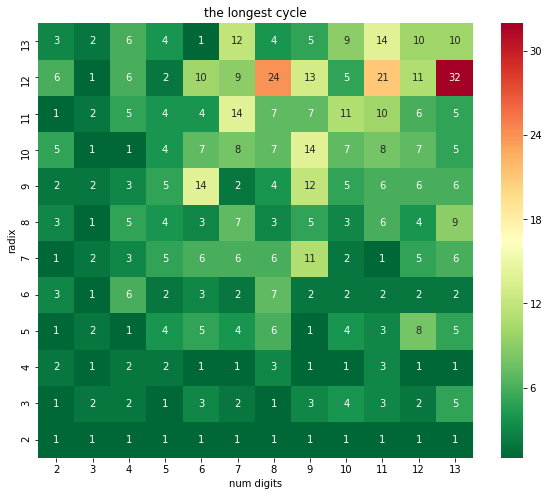

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8));
sns.heatmap(max_lengths, xticklabels=ds, yticklabels=rs, annot=True, ax=ax, cmap='RdYlGn_r', square=True);
ax.set_title('the longest cycle')
ax.set_xlabel('num digits');
ax.set_ylabel('radix');
ax.set(xlim=(0, len(ds)), ylim=(0, len(rs)));

In [32]:
def Prettify(digits, d):
    alphabeth = '0123456789ABCDEF'
    s = ''.join([alphabeth[digit] for digit in digits])
    s = '0' * (d - len(s)) + s
    return s

In [33]:
pretty_cycles = {key: [list(map(lambda x: Prettify(x, key[1]), cycle)) for cycle in cycles[key]] for key in cycles}

In [34]:
pretty_fixed_points = {key: list(map(lambda x: Prettify(x, key[1]), fixed_points[key])) for key in fixed_points}

In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame(num_fixed_points, index=rs, columns=ds)
df.to_csv('num_fixed_points.csv')

In [37]:
df = pd.DataFrame(num_cycles, index=rs, columns=ds)
df.to_csv('num_cycles.csv')

In [38]:
df = pd.DataFrame(max_lengths, index=rs, columns=ds)
df.to_csv('cycle_max_length.csv')